<a href="https://colab.research.google.com/github/AtaDemirkiran/heart-attack-risk/blob/main/sagl%C4%B1k_bilimlerinde_veri_analitigi_proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Sosyal Yaşam Alışkanlıkları ve Demografik Faktörlerin Kalp Krizi Riskine Etkisi***

In [70]:
# what are the main factors affecting heart attack dependent and independent
# considering human features and / or attributes
# literatürde ortalama kavramı var mı yoksa nötr ve normal olabilir mi

In [71]:
# dataset
# https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [74]:
df.head(3)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0


In [75]:
# BAĞIMSIZ DEĞİŞKENLER ========> Age , Sex ,Smoking,Income, Alcohol Consumption,Obesity,diabetes,Exercise Hours Per Week, Diet, Stress Level, Sedentary Hours Per Day, Sleep Hours Per Day

# BAĞIMLI DEĞİŞKEN ============> Heart Attack Risk


In [122]:
# hipotezime göre dataseti hazırlama

df_dataset = df.copy()

In [78]:
df_dataset.head(3)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0


In [79]:
df_dataset = df.loc[:, ['Age', 'Sex','Income','Alcohol Consumption','Obesity','Diabetes','Smoking', 'Exercise Hours Per Week', 'Diet', 'Stress Level',
                        'Sedentary Hours Per Day', 'Sleep Hours Per Day', 'Heart Attack Risk']]


In [80]:
df_dataset.head(3)

,Age,Sex,Income,Alcohol Consumption,Obesity,Diabetes,Smoking,Exercise Hours Per Week,Diet,Stress Level,Sedentary Hours Per Day,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,261404,0,0,0,1,4.168189,Average,9,6.615001,6,0
1,21,Male,285768,1,1,1,1,1.813242,Unhealthy,1,4.963459,7,0
2,21,Female,235282,0,0,1,0,2.078353,Healthy,9,9.463426,4,0


In [81]:
# özelliklerin kontrolü
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      8763 non-null   int64  
 1   Sex                      8763 non-null   object 
 2   Income                   8763 non-null   int64  
 3   Alcohol Consumption      8763 non-null   int64  
 4   Obesity                  8763 non-null   int64  
 5   Diabetes                 8763 non-null   int64  
 6   Smoking                  8763 non-null   int64  
 7   Exercise Hours Per Week  8763 non-null   float64
 8   Diet                     8763 non-null   object 
 9   Stress Level             8763 non-null   int64  
 10  Sedentary Hours Per Day  8763 non-null   float64
 11  Sleep Hours Per Day      8763 non-null   int64  
 12  Heart Attack Risk        8763 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 890.1+ KB


In [82]:
# null özellik kontrolü
df_dataset.isnull().sum()

,0
Age,0
Sex,0
Income,0
Alcohol Consumption,0
Obesity,0
Diabetes,0
Smoking,0
Exercise Hours Per Week,0
Diet,0
Stress Level,0


In [83]:
# cinsiyet column için sayısal değere çevrilmesi
# male  = 1
# female = 0

In [84]:
df_dataset['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [85]:
df_dataset['Sex'] = df_dataset['Sex'].map({'Male': 1, 'Female': 0})

In [86]:
df_dataset['Sex'].head(3)

,Sex
0,1
1,1
2,0


In [87]:
# diet column için sayısal değere çevirmeden önce değerlerin incelenmesi

In [88]:
df_dataset['Diet'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [89]:
# unhealty = 0, average = 1, healty = 2

df_dataset['Diet'] = df_dataset['Diet'].map({'Unhealthy': 0, 'Average': 1, 'Healthy': 2})

In [90]:
# nötr veya normal şeklinde olabilir

In [91]:
df_dataset.head(3)

,Age,Sex,Income,Alcohol Consumption,Obesity,Diabetes,Smoking,Exercise Hours Per Week,Diet,Stress Level,Sedentary Hours Per Day,Sleep Hours Per Day,Heart Attack Risk
0,67,1,261404,0,0,0,1,4.168189,1,9,6.615001,6,0
1,21,1,285768,1,1,1,1,1.813242,0,1,4.963459,7,0
2,21,0,235282,0,0,1,0,2.078353,2,9,9.463426,4,0


***Dataset genel inceleme***

In [116]:
df_dataset.describe()

,Age,Sex,Income,Alcohol Consumption,Obesity,Diabetes,Smoking,Exercise Hours Per Week,Diet,Stress Level,Sedentary Hours Per Day,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.697364,158263.181901,0.598083,0.501426,0.652288,0.896839,10.014284,1.007874,5.469702,5.993690,7.023508,0.358211
std,21.249509,0.459425,80575.190806,0.490313,0.500026,0.476271,0.304186,5.783745,0.817134,2.859622,3.466359,1.988473,0.479502
min,18.000000,0.000000,20062.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,1.000000,0.001263,4.000000,0.000000
25%,35.000000,0.000000,88310.000000,0.000000,0.000000,0.000000,1.000000,4.981579,0.000000,3.000000,2.998794,5.000000,0.000000
50%,54.000000,1.000000,157866.000000,1.000000,1.000000,1.000000,1.000000,10.069559,1.000000,5.000000,5.933622,7.000000,0.000000
75%,72.000000,1.000000,227749.000000,1.000000,1.000000,1.000000,1.000000,15.050018,2.000000,8.000000,9.019124,9.000000,1.000000
max,90.000000,1.000000,299954.000000,1.000000,1.000000,1.000000,1.000000,19.998709,2.000000,10.000000,11.999313,10.000000,1.000000


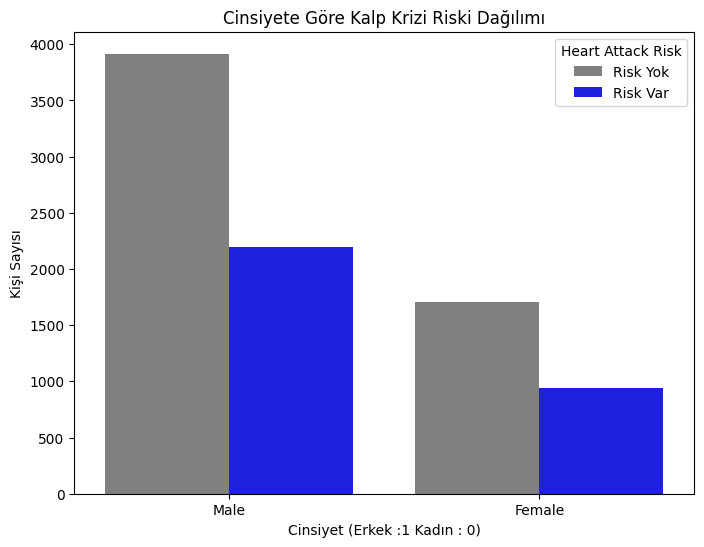

In [123]:
# cinsiyete göre kalp krizi risk dağılımı
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', hue='Heart Attack Risk', hue_order=[0, 1], data=df_dataset,
              palette={0: "gray", 1: "blue"})

plt.xlabel("Cinsiyet (Erkek :1 Kadın : 0)")
plt.ylabel("Kişi Sayısı")
plt.title("Cinsiyete Göre Kalp Krizi Riski Dağılımı")
plt.legend(title='Heart Attack Risk', labels=['Risk Yok', 'Risk Var'])
plt.show()


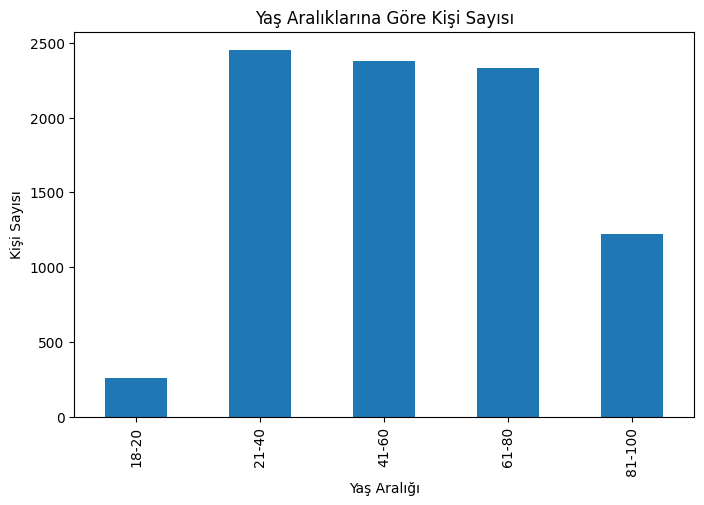

In [93]:
bins = [18, 20, 40, 60, 80, 100]
labels = ['18-20', '21-40', '41-60', '61-80', '81-100']

age_groups = pd.cut(df_dataset['Age'], bins=bins, labels=labels, right=True)

age_counts = age_groups.value_counts().sort_index()

plt.figure(figsize=(8, 5))
age_counts.plot(kind='bar')
plt.xlabel('Yaş Aralığı')
plt.ylabel('Kişi Sayısı')
plt.title('Yaş Aralıklarına Göre Kişi Sayısı')
plt.show()


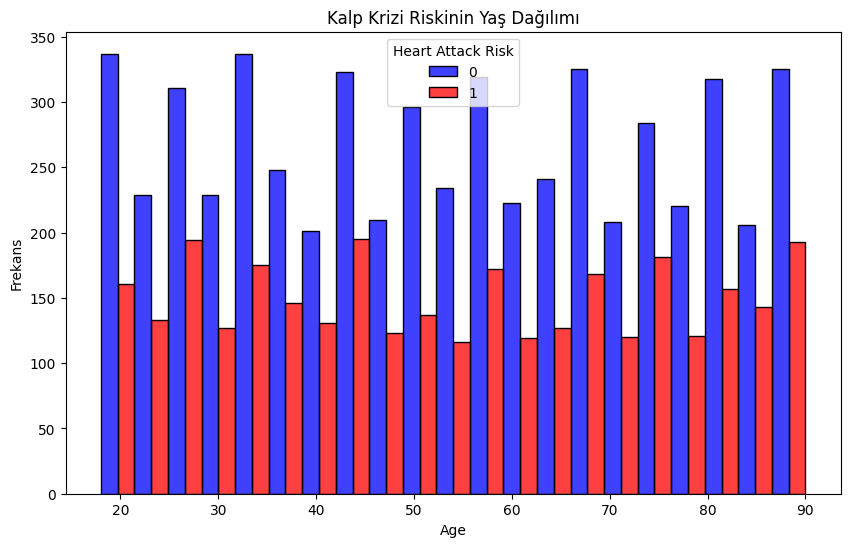

In [115]:
# yaşa göre kalp krizi risk dagılımı

plt.figure(figsize=(10,6))
sns.histplot(data=df_dataset, x="Age", hue="Heart Attack Risk", multiple="dodge",
             palette={0: "blue", 1: "red"})
plt.xlabel("Age")
plt.ylabel("Frekans")
plt.title("Kalp Krizi Riskinin Yaş Dağılımı")
plt.show()

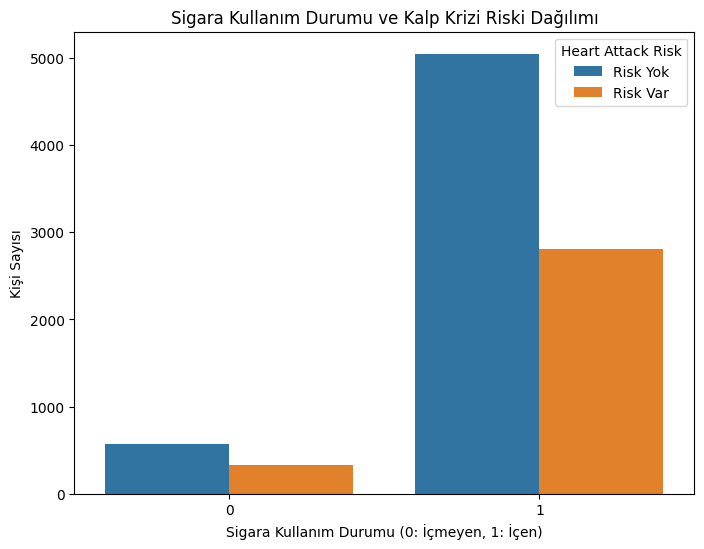

In [95]:
# burada mavi renkli olanlar kalp krizi riski 0 olanlar, turuncu olanlar kalp krizi riski olanlar anlamına geliyor

plt.figure(figsize=(8,6))
sns.countplot(x='Smoking', hue='Heart Attack Risk', hue_order=[0, 1], data=df_dataset)
plt.xlabel("Sigara Kullanım Durumu (0: İçmeyen, 1: İçen)")
plt.ylabel("Kişi Sayısı")
plt.title("Sigara Kullanım Durumu ve Kalp Krizi Riski Dağılımı")
plt.legend(title='Heart Attack Risk', labels=['Risk Yok', 'Risk Var'])
plt.show()


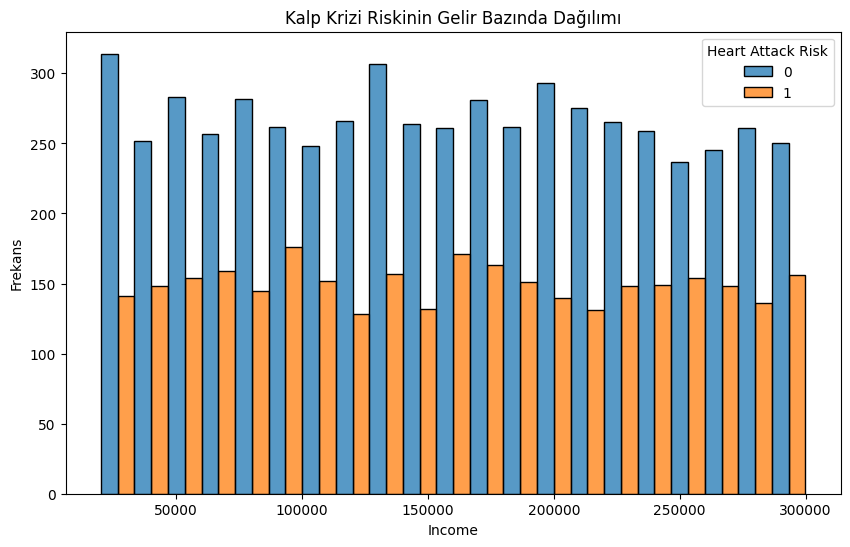

In [114]:
# gelir bazında kalp krizi risk dağılımlarının incelenmesi

plt.figure(figsize=(10,6))
sns.histplot(data=df_dataset, x="Income", hue="Heart Attack Risk", multiple="dodge")
plt.xlabel("Income")
plt.ylabel("Frekans")
plt.title("Kalp Krizi Riskinin Gelir Bazında Dağılımı")
plt.show()

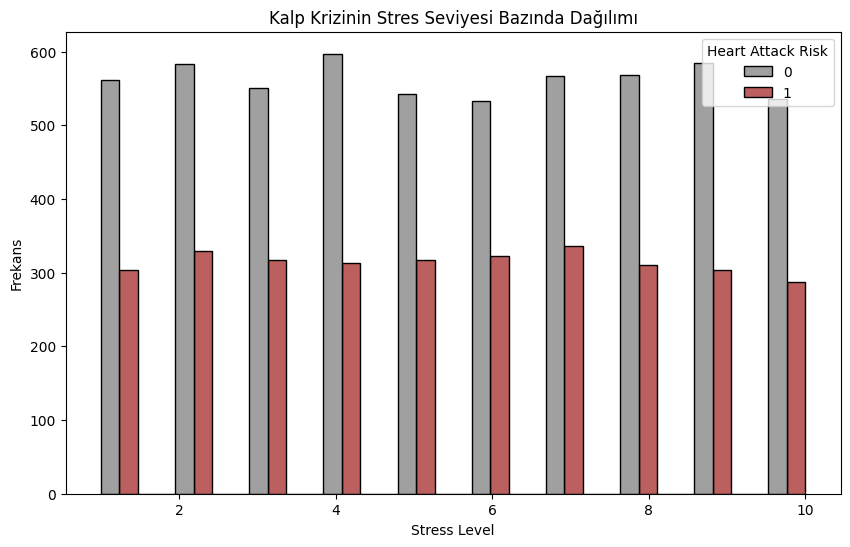

In [113]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_dataset, x="Stress Level", hue="Heart Attack Risk", multiple="dodge",
             palette={0: "grey", 1: "brown"})
plt.xlabel("Stress Level")
plt.ylabel("Frekans")
plt.title("Kalp Krizinin Stres Seviyesi Bazında Dağılımı")
plt.show()